In [1]:
import pymysql
connection = pymysql.connect(user='root', password='', host='localhost')
cursor = connection.cursor()

In [2]:
DATABASE = 'CREATE DATABASE woltdb'
cursor.execute(DATABASE)

ProgrammingError: (1007, "Can't create database 'woltdb'; database exists")

In [3]:
import pandas as pd

In [4]:
item_df=pd.read_csv('item_data.csv')
item_df.head(10)



,Unnamed: 0,VENUE_ID,TIMESTAMP,BRAND,MANUFACTURER,COST_PER_UNIT,COST_PER_UNIT_EUR,CURRENCY,APPLICABLE_TAX_PERC,PRODUCT_ID,ITEM_IDENTIFIER,EXTERNAL_ID
0,0,389290dde1,2022-02-01 00:00:00,NaN,Tern1,3.7200,3.720000,EUR,0.200,1e4998ae71,b10f899028,NaN
1,1,43448c7715,NaN,NaN,NaN,24.8000,1.040115,CZK,0.150,NaN,ee7a992cac,NaN
2,2,6adc2fbb91,NaN,Grøn Balance,VALSEMØLLEN A/S PRIVATE LABEL,6.7400,0.906093,DKK,0.250,740ede1018,3ea9f51fb7,NaN
3,3,9900b487b1,2022-09-13 00:00:00,ACTIVIA,"UAB Eugesta, Kibirkšties g. 8. Vilnius",1.5600,1.560000,EUR,0.210,e0c1503a4a,16feda8e89,c6105d7e2a
4,4,80ec4c53da,2022-01-01 00:00:00,ACTIVIA,NaN,466.0000,1.128937,HUF,0.180,edd05a3886,cc2c5e45fc,NaN
5,5,de707394bc,2021-12-01 00:00:00,Vitamineral,Y,0.7400,0.740000,EUR,0.200,NaN,a707a54455,NaN
6,6,4332da8cb2,2022-06-29 00:00:00,Corny,Schwartau,1.5092,1.509200,EUR,0.095,f12b27b7dd,100da60788,NaN
7,7,a3bd22fac6,2022-11-03 00:00:00,TOMS,TOMS SVERIGE AB,7.4800,0.685982,SEK,0.120,bda61dd510,2bc1b00ef0,NaN
8,8,80ec4c53da,2022-12-01 00:00:00,Milka,NaN,2518.0000,6.248548,HUF,0.270,2ca96809c3,4d2a6395a8,NaN
9,9,e6858c2a86,2022-08-29 00:00:00,NaN,NaN,3.3600,3.360000,EUR,0.000,1cd5ab06ea,e343b0ff03,NaN


inserting data frame ITEM into the tamporary table ITEM_TEMP

In [6]:
from sqlalchemy import create_engine
from mysql.connector import errorcode
import mysql.connector
    
db_data = 'mysql+pymysql://' + 'root' + ':' + '' + '@' + 'localhost' + ':3306/' \
       + 'woltdb' + '?charset=utf8mb4'

engine=create_engine(db_data)

item_df.to_sql('item_temp', engine,if_exists='replace',index=False)
item="SELECT * FROM item_temp;"
cursor.execute(item)
cursor.fetchall()

OperationalError: (1046, 'No database selected')

dropping the unnamed column which we dont need

In [7]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
DROP= """ALTER TABLE `item_temp` DROP `Unnamed: 0`;"""
cursor.execute(DROP)

0

In [8]:
purchase_df=pd.read_csv('purchase_data_final.csv')
purchase_df.head(10)


,Unnamed: 0,PURCHASE_ID,TIME_RECEIVED,TIME_DELIVERED,CURRENCY,COUNTRY,VENUE_ID
0,0,c766bf63dc,2022-07-14 06:01:34.426,2022-07-14 06:30:11.423,CZK,CZE,691d84b2f9
1,1,97b4d66216,2022-07-14 08:02:15.789,2022-07-14 08:28:26.345,CZK,CZE,691d84b2f9
2,2,9cadf4d3c4,2022-07-14 06:02:36.614,2022-07-14 06:30:02.425,CZK,CZE,691d84b2f9
3,3,66cf34e8d3,2022-07-14 14:04:45.640,2022-07-14 14:35:00.264,CZK,CZE,691d84b2f9
4,4,94fac08438,2022-07-14 19:04:46.876,2022-07-14 19:26:16.940,CZK,CZE,691d84b2f9
5,5,ebbeb05442,2022-07-14 06:05:02.972,2022-07-14 06:37:53.363,CZK,CZE,691d84b2f9
6,6,d0d8f3f58f,2022-07-14 07:06:01.765,2022-07-14 07:23:27.766,CZK,CZE,691d84b2f9
7,7,8b47d8538a,2022-07-14 12:07:45.994,2022-07-14 12:28:48.297,CZK,CZE,691d84b2f9
8,8,247223c02a,2022-07-14 09:08:18.421,2022-07-14 09:37:48.296,CZK,CZE,691d84b2f9
9,9,f601fcfef5,2022-07-14 12:09:36.258,2022-07-14 12:23:11.041,CZK,CZE,691d84b2f9


inserting purchase dataframe into the tamporart table PURCHASE_TEMP

In [9]:
purchase_df.to_sql('purchase_temp', engine,if_exists='append',index=False)
purchase="SELECT * FROM purchase_temp;"
cursor.execute(purchase)
cursor.fetchall()

((0,
  'c766bf63dc',
  '2022-07-14 06:01:34.426',
  '2022-07-14 06:30:11.423',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (1,
  '97b4d66216',
  '2022-07-14 08:02:15.789',
  '2022-07-14 08:28:26.345',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (2,
  '9cadf4d3c4',
  '2022-07-14 06:02:36.614',
  '2022-07-14 06:30:02.425',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (3,
  '66cf34e8d3',
  '2022-07-14 14:04:45.640',
  '2022-07-14 14:35:00.264',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (4,
  '94fac08438',
  '2022-07-14 19:04:46.876',
  '2022-07-14 19:26:16.940',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (5,
  'ebbeb05442',
  '2022-07-14 06:05:02.972',
  '2022-07-14 06:37:53.363',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (6,
  'd0d8f3f58f',
  '2022-07-14 07:06:01.765',
  '2022-07-14 07:23:27.766',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (7,
  '8b47d8538a',
  '2022-07-14 12:07:45.994',
  '2022-07-14 12:28:48.297',
  'CZK',
  'CZE',
  '691d84b2f9'),
 (8,
  '247223c02a',
  '2022-07-14 09:08:18.421',
  '2022-07-14 09:37:48.296',
  'CZK',


dropping the unnamed columns which we dont need

In [10]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
create_table_query= """ALTER TABLE `purchase_temp` DROP `Unnamed: 0`;"""
cursor.execute(create_table_query)

0

In [11]:
purchase_item_df=pd.read_csv('purchase_item_data_final.csv')

purchase_item_df.head(10)


,Unnamed: 0,PRODUCT_ID,PURCHASE_ID,COUNT,VENUE_ID,BASEPRICE,VAT_PERCENTAGE
0,0,0e67b01e73,8d729f3e3a,1,5be413ed1f,1.19,20.0
1,1,24f9c620c6,8d729f3e3a,1,5be413ed1f,2.49,20.0
2,2,27e0da88f2,8d729f3e3a,1,5be413ed1f,2.59,20.0
3,3,7ab5d8bbe6,8d729f3e3a,1,5be413ed1f,2.69,20.0
4,19,2b21ae2ec0,dbc88373f6,6,5c47e55304,22.95,25.0
5,20,0ba3c3e7e2,dbc88373f6,2,5c47e55304,34.50,25.0
6,21,ddd557d878,dbc88373f6,2,5c47e55304,19.50,25.0
7,22,f9c4a9933e,dbc88373f6,1,5c47e55304,21.50,25.0
8,24,ec423edaa2,dbc88373f6,8,5c47e55304,20.95,25.0
9,25,8df279ab62,dbc88373f6,1,5c47e55304,35.95,25.0


inserting purchase item dataframe into the temporary table PURCHASE_ITEM_TEMP

In [12]:
purchase_item_df.to_sql('purchase_item_temp', engine,if_exists='append',index=False)
purchase_item="SELECT * FROM purchase_item_temp;"
cursor.execute(purchase_item)
cursor.fetchall()

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 'Unnamed: 0' in 'field list'")
[SQL: INSERT INTO purchase_item_temp (`Unnamed: 0`, `PRODUCT_ID`, `PURCHASE_ID`, `COUNT`, `VENUE_ID`, `BASEPRICE`, `VAT_PERCENTAGE`) VALUES (%(UnnamedC 0)s, %(PRODUCT_ID)s, %(PURCHASE_ID)s, %(COUNT)s, %(VENUE_ID)s, %(BASEPRICE)s, %(VAT_PERCENTAGE)s)]
[parameters: ({'UnnamedC 0': 0, 'PRODUCT_ID': '0e67b01e73', 'PURCHASE_ID': '8d729f3e3a', 'COUNT': 1, 'VENUE_ID': '5be413ed1f', 'BASEPRICE': 1.19, 'VAT_PERCENTAGE': 20.0}, {'UnnamedC 0': 1, 'PRODUCT_ID': '24f9c620c6', 'PURCHASE_ID': '8d729f3e3a', 'COUNT': 1, 'VENUE_ID': '5be413ed1f', 'BASEPRICE': 2.49, 'VAT_PERCENTAGE': 20.0}, {'UnnamedC 0': 2, 'PRODUCT_ID': '27e0da88f2', 'PURCHASE_ID': '8d729f3e3a', 'COUNT': 1, 'VENUE_ID': '5be413ed1f', 'BASEPRICE': 2.59, 'VAT_PERCENTAGE': 20.0}, {'UnnamedC 0': 3, 'PRODUCT_ID': '7ab5d8bbe6', 'PURCHASE_ID': '8d729f3e3a', 'COUNT': 1, 'VENUE_ID': '5be413ed1f', 'BASEPRICE': 2.69, 'VAT_PERCENTAGE': 20.0}, {'UnnamedC 0': 19, 'PRODUCT_ID': '2b21ae2ec0', 'PURCHASE_ID': 'dbc88373f6', 'COUNT': 6, 'VENUE_ID': '5c47e55304', 'BASEPRICE': 22.95, 'VAT_PERCENTAGE': 25.0}, {'UnnamedC 0': 20, 'PRODUCT_ID': '0ba3c3e7e2', 'PURCHASE_ID': 'dbc88373f6', 'COUNT': 2, 'VENUE_ID': '5c47e55304', 'BASEPRICE': 34.5, 'VAT_PERCENTAGE': 25.0}, {'UnnamedC 0': 21, 'PRODUCT_ID': 'ddd557d878', 'PURCHASE_ID': 'dbc88373f6', 'COUNT': 2, 'VENUE_ID': '5c47e55304', 'BASEPRICE': 19.5, 'VAT_PERCENTAGE': 25.0}, {'UnnamedC 0': 22, 'PRODUCT_ID': 'f9c4a9933e', 'PURCHASE_ID': 'dbc88373f6', 'COUNT': 1, 'VENUE_ID': '5c47e55304', 'BASEPRICE': 21.5, 'VAT_PERCENTAGE': 25.0}  ... displaying 10 of 1652182 total bound parameter sets ...  {'UnnamedC 0': 1959785, 'PRODUCT_ID': '7c6b79ff5a', 'PURCHASE_ID': '6533352369', 'COUNT': 1, 'VENUE_ID': '691d84b2f9', 'BASEPRICE': 26.9, 'VAT_PERCENTAGE': 15.0}, {'UnnamedC 0': 1959786, 'PRODUCT_ID': 'b89cb3dd4b', 'PURCHASE_ID': '6533352369', 'COUNT': 3, 'VENUE_ID': '691d84b2f9', 'BASEPRICE': 21.9, 'VAT_PERCENTAGE': 21.0})]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

dropping the column Unnamed: 0 which we dont need

In [13]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
DROP= """ALTER TABLE `purchase_item_temp` DROP `Unnamed: 0`;"""
cursor.execute(DROP)

OperationalError: (1091, "Can't DROP COLUMN `Unnamed: 0`; check that it exists")

creating tables ITEM,PURCHASE and PURCHASE_ITEM 

In [14]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
create_purchase_query= """CREATE OR REPLACE TABLE PURCHASE (
    PURCHASE_ID varchar(20)  NOT NULL ,
    TIME_DELIVERED datetime  ,
    TIME_RECEIVED datetime  ,
    CURRENCY varchar(5)  ,
    COUNTRY varchar(20)  ,
    VENUE_ID varchar(20) 
   
);"""
cursor.execute(create_purchase_query)

0

In [15]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
create_item_query= """CREATE OR REPLACE TABLE ITEM (
    VENUE_ID varchar(20)  ,
    AVAILABLE_TIMESTAMP datetime  ,
    BRAND varchar(500)  ,
    MANUFACTURER varchar(500)  ,
    COST_PER_UNIT Float   ,
    COST_PER_UNIT_EUR Float   ,
    CURRENCY varchar(20)  ,
    APPLICABLE_TAX_PERC Float  ,
    PRODUCT_ID varchar(20)  NOT NULL ,
    ITEM_IDENTIFIER varchar(50)  ,
    EXTERNAL_ID varchar(50) 
    

);"""
cursor.execute(create_item_query)

0

In [16]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
create_purchase_item_query= """CREATE OR REPLACE TABLE PURCHASE_ITEM (
    PRODUCT_ID varchar(20) NOT NULL ,
    PURCHASE_ID varchar(20) NOT NULL ,
    PURCHASE_COUNT int  , 
    VENUE_ID varchar(20)  ,
    BASEPRICE double(12,2) , 
    VAT_PERCENTAGE FLOAT
);
"""
cursor.execute(create_purchase_item_query)

0

importing data from tamporary tables into the new tables

In [32]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
INSERT_INTO_ITEM= """INSERT INTO item( VENUE_ID, AVAILABLE_TIMESTAMP, BRAND, MANUFACTURER, COST_PER_UNIT, COST_PER_UNIT_EUR, CURRENCY, APPLICABLE_TAX_PERC, PRODUCT_ID, ITEM_IDENTIFIER, EXTERNAL_ID ) 
SELECT VENUE_ID, TIMESTAMP, BRAND, MANUFACTURER, COST_PER_UNIT, COST_PER_UNIT_EUR, CURRENCY, APPLICABLE_TAX_PERC, PRODUCT_ID, ITEM_IDENTIFIER, EXTERNAL_ID 
FROM item_temp 
WHERE NOT EXISTS( SELECT VENUE_ID, AVAILABLE_TIMESTAMP, BRAND, MANUFACTURER, COST_PER_UNIT, COST_PER_UNIT_EUR, CURRENCY, APPLICABLE_TAX_PERC, PRODUCT_ID, ITEM_IDENTIFIER, EXTERNAL_ID 
FROM item 
WHERE item_temp.VENUE_ID = item.VENUE_ID 
AND item_temp.TIMESTAMP = item.AVAILABLE_TIMESTAMP 
AND item_temp.BRAND = item.BRAND AND item_temp.MANUFACTURER = item.MANUFACTURER 
AND item_temp.COST_PER_UNIT = item.COST_PER_UNIT 
AND item_temp.COST_PER_UNIT_EUR = item.COST_PER_UNIT_EUR 
AND item_temp.CURRENCY = item.CURRENCY 
AND item_temp.APPLICABLE_TAX_PERC = item.APPLICABLE_TAX_PERC 
AND item_temp.PRODUCT_ID = item.PRODUCT_ID 
AND item_temp.ITEM_IDENTIFIER = item.ITEM_IDENTIFIER 
AND item_temp.EXTERNAL_ID = item.EXTERNAL_ID 
)AND PRODUCT_ID IS NOT NULL;"""

cursor.execute(INSERT_INTO_ITEM)

26784

In [46]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
INSERT_PURCHASE_ITEM= """INSERT INTO Purchase_item( PRODUCT_ID, PURCHASE_ID, PURCHASE_COUNT, VENUE_ID , BASEPRICE, VAT_PERCENTAGE ) 
SELECT PRODUCT_ID, PURCHASE_ID, COUNT , VENUE_ID , BASEPRICE, VAT_PERCENTAGE 
FROM purchase_item_temp 
WHERE NOT EXISTS( SELECT PRODUCT_ID, PURCHASE_ID, PURCHASE_COUNT , VENUE_ID , BASEPRICE, VAT_PERCENTAGE 
FROM purchase_item 
WHERE purchase_item_temp.PRODUCT_ID=purchase_item.product_id 
AND purchase_item_temp.PURCHASE_ID=purchase_item.purchase_id 
AND purchase_item_temp.COUNT=purchase_item.PURCHASE_COUNT 
AND purchase_item_temp.VENUE_ID=purchase_item.VENUE_ID 
AND purchase_item_temp.BASEPRICE=purchase_item.BASEPRICE 
AND purchase_item_temp.VAT_PERCENTAGE=purchase_item.VAT_PERCENTAGE )
AND PRODUCT_ID IS NOT NULL AND PURCHASE_ID IS NOT NULL;"""
cursor.execute(INSERT_PURCHASE_ITEM)

OperationalError: (2006, "MySQL server has gone away (ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))")

In [45]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
INSERT_PURCHASE= """INSERT INTO purchase( PURCHASE_ID, TIME_DELIVERED, TIME_RECEIVED, CURRENCY, COUNTRY, VENUE_ID ) 
SELECT PURCHASE_ID, TIME_DELIVERED, TIME_RECEIVED, CURRENCY, COUNTRY, VENUE_ID 
FROM purchase_temp 
WHERE NOT EXISTS( SELECT PURCHASE_ID, TIME_DELIVERED, TIME_RECEIVED, CURRENCY, COUNTRY, VENUE_ID 
FROM purchase 
WHERE purchase_temp.PURCHASE_ID=purchase.PURCHASE_ID 
AND purchase_temp.TIME_DELIVERED=purchase_temp.TIME_DELIVERED 
AND purchase_temp.TIME_RECEIVED=purchase.TIME_RECEIVED 
AND purchase_temp.CURRENCY=purchase.CURRENCY 
AND purchase_temp.COUNTRY=purchase.COUNTRY 
AND purchase_temp.VENUE_ID=purchase.VENUE_ID )AND PURCHASE_ID IS NOT NULL;"""
cursor.execute(INSERT_PURCHASE)

5000

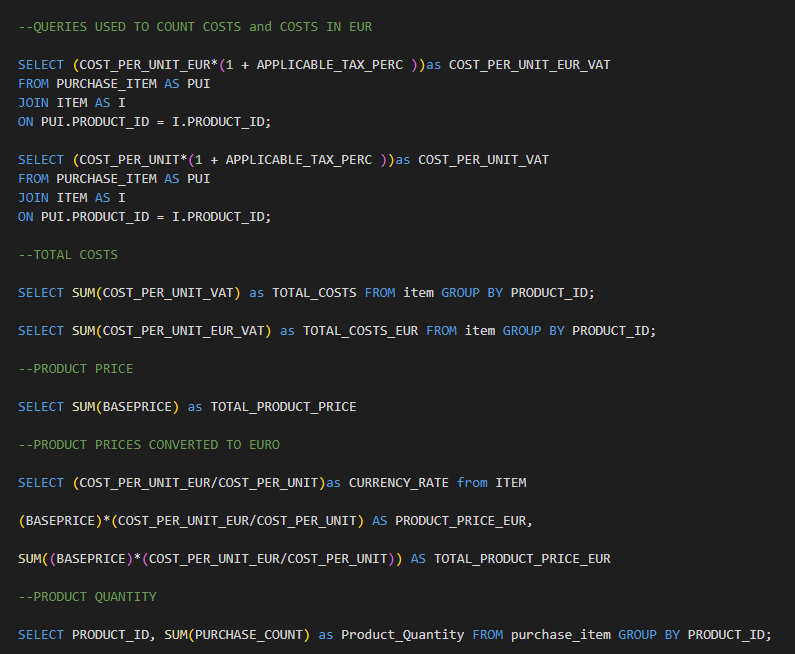








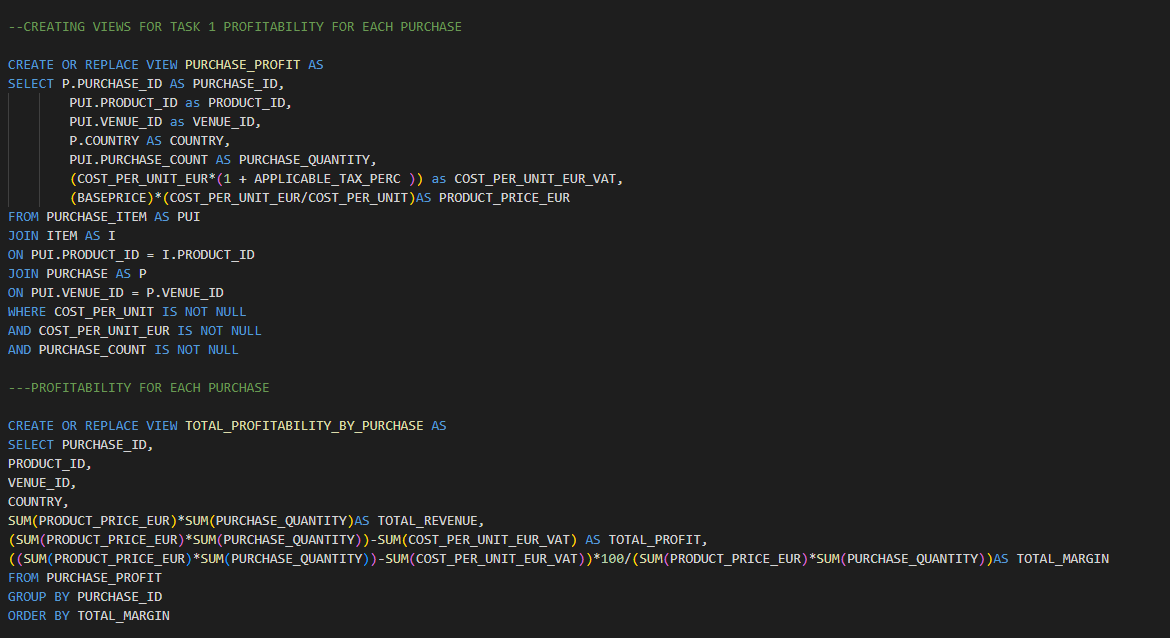

In [51]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
VIEW_PURCHASE_PROFIT= """CREATE OR REPLACE VIEW PURCHASE_PROFIT AS 
SELECT P.PURCHASE_ID AS PURCHASE_ID, 
PUI.PRODUCT_ID as PRODUCT_ID, 
PUI.VENUE_ID as VENUE_ID, 
P.COUNTRY AS COUNTRY, 
P.TIME_DELIVERED AS TIME_DELIVERED, 
(COST_PER_UNIT*(1 + APPLICABLE_TAX_PERC )) as COST_PER_UNIT_VAT, 
(COST_PER_UNIT_EUR*(1 + APPLICABLE_TAX_PERC )) as COST_PER_UNIT_EUR_VAT, 
PURCHASE_COUNT as PURCHASE_QUANTITY, 
(BASEPRICE+(BASEPRICE*VAT_PERCENTAGE))*((COST_PER_UNIT_EUR*(1 + APPLICABLE_TAX_PERC ))/(COST_PER_UNIT*(1 + APPLICABLE_TAX_PERC )))AS PRODUCT_PRICE_EUR 
FROM PURCHASE_ITEM AS PUI 
JOIN ITEM AS I 
ON PUI.PRODUCT_ID = I.PRODUCT_ID 
JOIN PURCHASE AS P 
ON PUI.VENUE_ID = P.VENUE_ID 
WHERE COST_PER_UNIT IS NOT NULL AND COST_PER_UNIT_EUR IS NOT NULL AND PURCHASE_COUNT IS NOT NULL AND BASEPRICE IS NOT NULL
GROUP BY PURCHASE_ID;"""
cursor.execute(VIEW_PURCHASE_PROFIT)

0

In [52]:
use_database_query = "USE woltdb"
cursor.execute(use_database_query)
PROFITABILITY_BY_PURCHASE= """CREATE OR REPLACE VIEW TOTAL_PROFITABILITY_BY_PURCHASE AS 
SELECT PURCHASE_ID, 
PRODUCT_ID, 
VENUE_ID, 
COUNTRY, 
SUM(COST_PER_UNIT_EUR_VAT) AS TOTAL_COSTS, 
SUM(PRODUCT_PRICE_EUR) AS TOTAL_PRODUCT_PRICE, 
SUM(PURCHASE_QUANTITY) AS TOTAL_PURCHASE_QUANTITY, 
(SUM(PRODUCT_PRICE_EUR)*SUM(PURCHASE_QUANTITY))-SUM(COST_PER_UNIT_EUR_VAT) AS TOTAL_PROFIT, 
((SUM(PRODUCT_PRICE_EUR)*SUM(PURCHASE_QUANTITY))-SUM(COST_PER_UNIT_EUR_VAT))*100/(SUM(PRODUCT_PRICE_EUR)*SUM(PURCHASE_QUANTITY))AS TOTAL_MARGIN 
FROM PURCHASE_PROFIT 
GROUP BY PURCHASE_ID
ORDER BY TOTAL_MARGIN;"""
cursor.execute(PROFITABILITY_BY_PURCHASE)

0

***REVENUE=PRODUCT_PRICE*PRODUCT_QUANTITY<br>
TOTAL PROFIT=TOTAL REVENUE-TOTAL_COSTS<br>
TOTAL MARGIN=TOTAL PROFIT/TOTAL REVENUE <br>
AOV (avg order volume)=TOTAL_REVENUE/TOTAL_PRODUCT_QUANTITY  IN CERTAIN DATA RANGE***

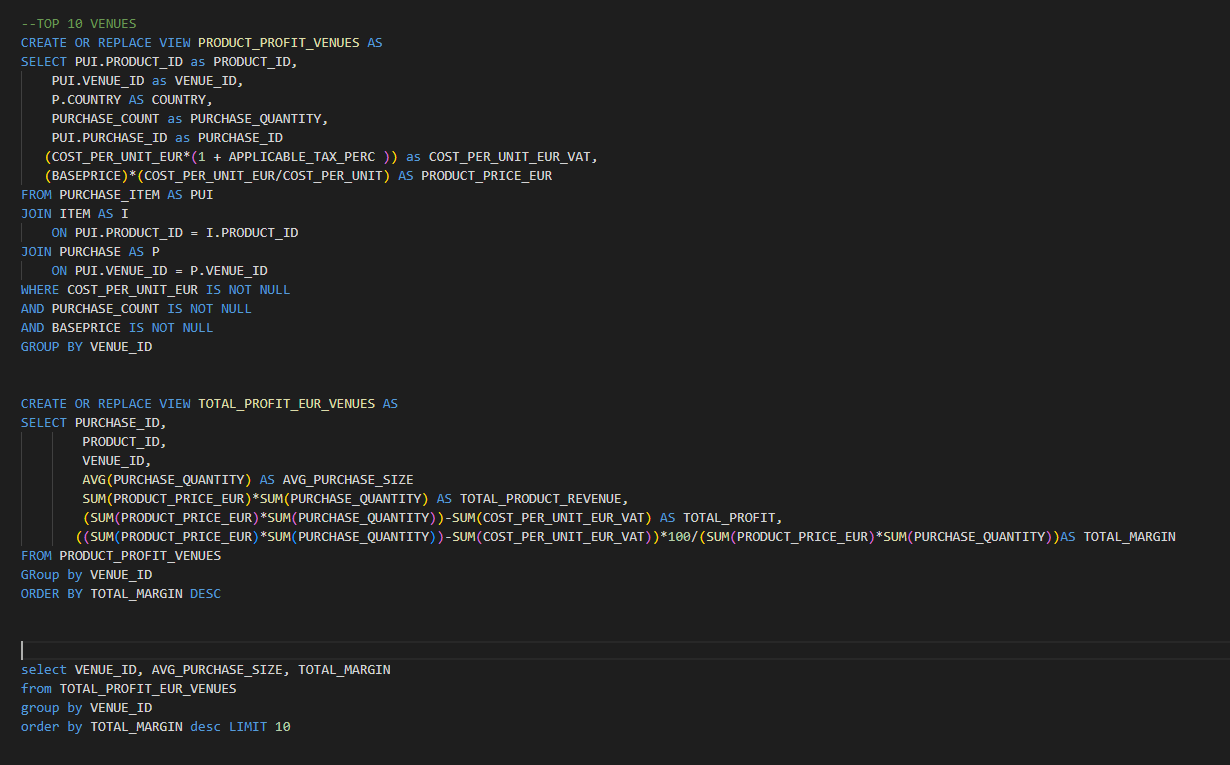

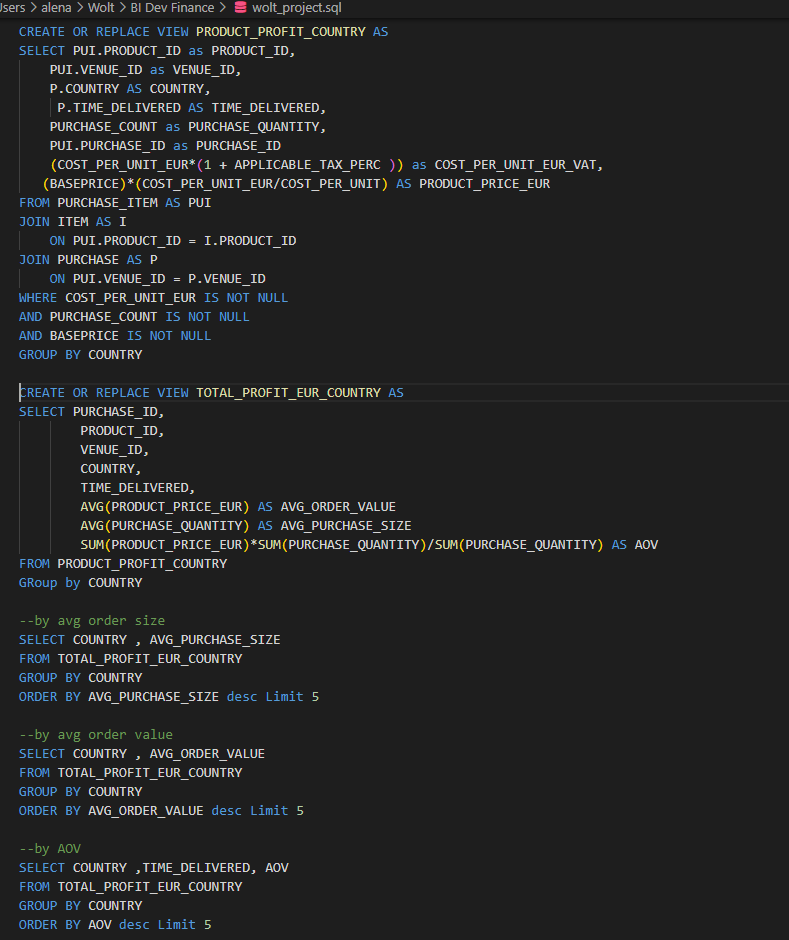

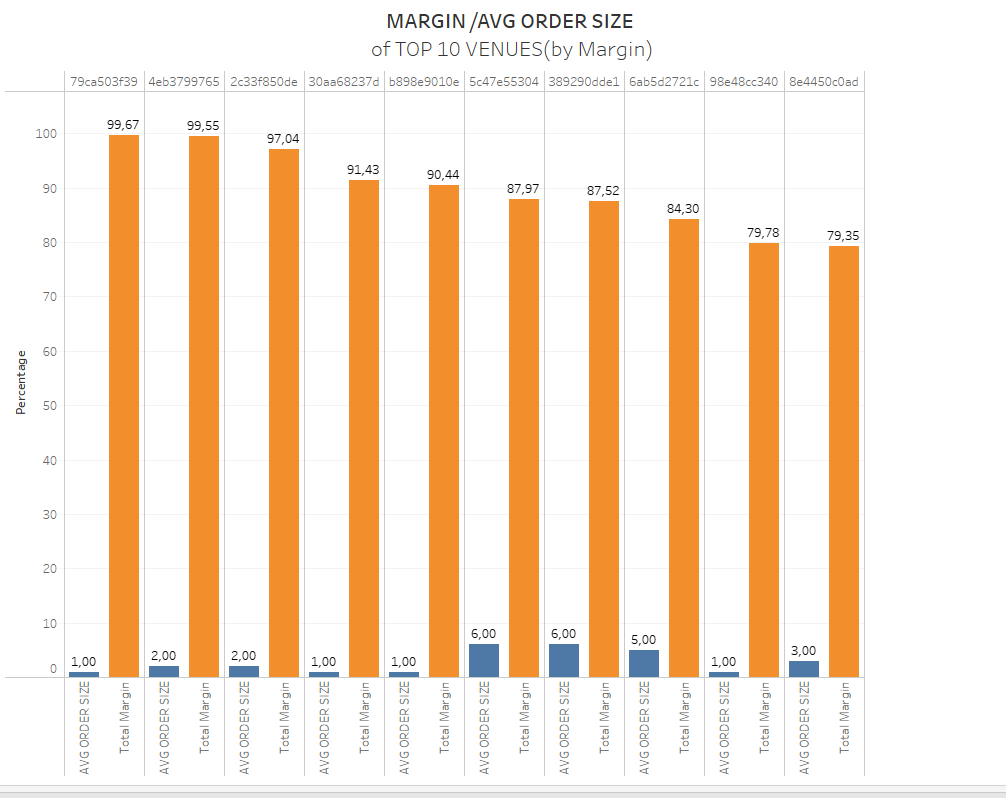

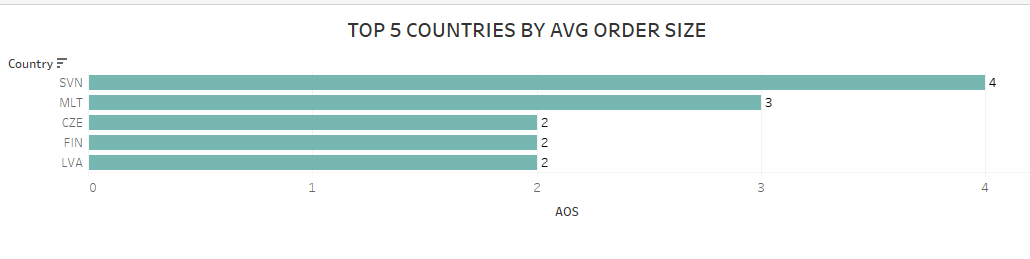

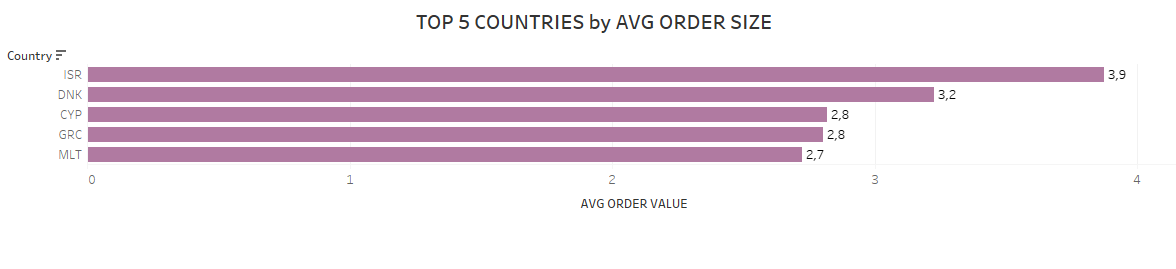

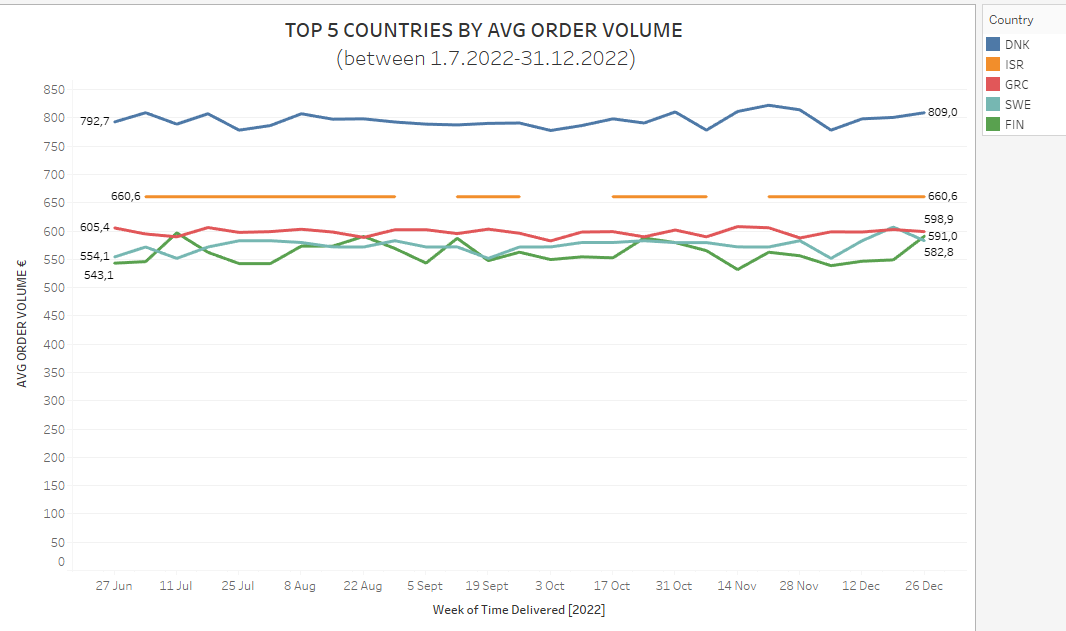

1. When creating the gross margin calculations, we need to calculate first the TOTAL REVENUE and TOTAL PROFIT. To get the revenue and profit, we use COST_PER_UNIT,COST_PER_UNIT_EUR, APPLICABLE_TAX,PURCHASE_COUNT and BASEPRICE values from our tables. We assume the costs and base price data are in local currencies or Euro. Applicable tax is in percentage and purchase count is integer. We assume these data are not null or !=0, otherwise they would mess up the calculations, therefore I excluded those from the calculations. According to the customer needs we can decide to modify the missing values (f.e. 0 or -999 for numeric and 'missing' for categorical data). In these case I decided to leave them as NULL.


2. There were missing values in most of the columns in our tables. I didnt insert rows where PRODUCT_ID OR PURCHASE_ID were missing. For the calculations I also excluded the NULL values of COSTS, BASEPRICES and TAX. I also encountered problems on my computer (not enough memory) because the files were too large.To be able to create visualization of the data with TABLEAU PUBLIC I used first 50 000 rows of each file. I know this is not the best solution, but because of the lack of time, this was the only way I could provide the visualizations and it gives as an idea about the TOP countries and venues. 


3. To improve the solution, it would be useful to have names of the venues and description of the products, for better understading of  the purchases. From the VENUE ID and PRODUCT ID it is hard to recognize the top venues or the most sold products. TO solve the problem with the large data sets, we could split the data in to quaratals to smaller files or remove unnecesarry columns.